Problem 1

***Show that $P(A+B|I)=P(A|I)+P(B|I)-P(A,B|I)$***

We start by decomposing B into $B = AB + \bar{A}B$

We use this result to show $P(A+B|I) = P(A + AB + \bar{A}B|I)$ by substituting our expression for B in. We can have the three terms be in any order due to OR opperations being communitive. 

We now can use the property of absorption to show $A = A + AB$. Using this, we find  $P(A+B|I) = P(A + \bar{A}B|I)$

Since this is mutually exclusive we can use axiom of aditivity. This lets us split the right side into a sum of probabilities. Some more on this axiom is shown below. $P(A+B|I) = P(A|I) + P(\bar{A}B|I)$

We know $P(B|I) = P(\bar{A}B|I) + P(AB|I)$ from the decomposition we did before. We move that around to $P(NOT(A)B|I) = P(B|I) - P(AB|I)$

Therefore we have shown
**$P(A+B|I) = P(A|I) + P(B|I) - P(AB|I)$**

Little justification on 'axiom of aditivity' 
$A + \bar{A}B$ cannot be true at the same time. If we make a little truth table you would find there is no case where
the component parts of the OR condition are both true simultaneously. i.e. $A(\bar{A}B) = False$
Therefore we can state that $P(A + \bar{A}B) = P(A) + P(\bar{A}B)$ because there is no overlap region we miss out on
there is no correction term to take care of with this, unlike how we have to subtract A AND B from breaking A+B up

Problem 2

***Of people who get lung cancer, smokers are 25× more likely compared to non-smokers to get lung cancer. If we are given a person who has lung cancer, what is the probability that they are a smoker?***

Probably need Bayes Theorem for this:
$
P(\text{Smoker} \mid \text{Lung Cancer})
= \frac{P(\text{Lung Cancer} \mid \text{Smoker}),P(\text{Smoker})}
{P(\text{Lung Cancer})}
$

I think the correct way to interpret what we are given is
$
P(\text{Lung Cancer} \mid \text{Smoker})
= 25P(\text{Lung Cancer} \mid \neg\text{Smoker})
$

The total probability of lung cancer is:
$
P(\text{Lung Cancer}) = P(\text{Lung Cancer} \mid \text{Smoker}),P(\text{Smoker}) * P(\text{Lung Cancer} \mid\neg\text{Smoker}),P(\neg\text{Smoker})
$

This is sort of a sum rule -- not sure what it is called specifically, but the probability in total must be the same as the sum of the conditional probabilities across all conditions.

Let’s start substituting.

$
P(\text{Smoker} \mid \text{Lung Cancer}) = \frac{P(\text{Lung Cancer} \mid \text{Smoker}),P(\text{Smoker})}{P(\text{Lung Cancer})}
$

Substitute for $P(\text{Lung Cancer})$:
$
P(\text{Smoker} \mid \text{Lung Cancer}) = \frac{P(\text{Lung Cancer} \mid \text{Smoker}),P(\text{Smoker})} {P(\text{Lung Cancer} \mid \text{Smoker}),P(\text{Smoker}) + P(\text{Lung Cancer} \mid \neg\text{Smoker}),P(\neg\text{Smoker})}
$

Substitute in the cancer rates:
$
P(\text{Smoker} \mid \text{Lung Cancer}) = \frac{P(\text{Lung Cancer} \mid \text{Smoker}),P(\text{Smoker})} {P(\text{Lung Cancer} \mid \text{Smoker}),P(\text{Smoker}) + \frac{1}{25}P(\text{Lung Cancer} \mid \text{Smoker}),P(\neg\text{Smoker})}
$

$P(\text{Lung Cancer} \mid \text{Smoker})$ will cancel out:
$
P(\text{Smoker} \mid \text{Lung Cancer}) = \frac{P(\text{Smoker})} {P(\text{Smoker}) + \frac{P(\neg\text{Smoker})}{25}}
$

Substitute $P(\neg\text{Smoker}) = 1 - P(\text{Smoker})$:
$
P(\text{Smoker} \mid \text{Lung Cancer}) = \frac{P(\text{Smoker})} {P(\text{Smoker}) + \frac{1 - P(\text{Smoker})}{25}}
$

If we let $s = P(\text{Smoker})$ then we show:
$
P(\text{Smoker} \mid \text{Lung Cancer}) = \frac{s}{s + \frac{1 - s}{25}}
$


In [187]:
#I see 11.6% of adults in 2022 smoke (American Lung Association https://www.lung.org/research/trends-in-lung-disease/tobacco-trends-brief/overall-smoking-trends)

s=0.116
P = s/(s+((1-s)/25))
print('The probability of someone with lung cancer being a smoker is ' + str(100*P) + '%')
#Playing around with s, it's pretty interesting how small deviations affect the result
#But s=1 and s=0 give the correct answers and if you are 25x more likely to get cancer then effectively you have 25x11.6%=2.9 compared to 0.884 cases. 
#And doing the math on those unnormalized uhhh plausibilities we get the same number as our calculation expects

The probability of someone with lung cancer being a smoker is 76.63847780126851%


Problem 3 Just needs formatting

In [13]:
#This is some punnet square stuff. 2 brown eye parents have 3 kids, and at least one of them has blue eyes
#What we know is that both parents have the dominant brown gene, as well as the recessive blue gene
#DOminant brown because the parent's eyes are brown, and resessive blue because one of the kids is blue
#This would be more interesting if we didn't know the parent's eye colors. Would have to marganalize across 3 possibilities
#Thankfully we don't have to do that :D

#Part A.)
#If we know one kid has blue eyes, what is the probability of *at least* 2 kids having blue eyes?
#OK to start we know there is a 3/4*3/4*3/4 probability the parents have all brown eye kids
#Therefore there is a 1-(3/4)^3 probability there is at least 1 blue eye kid in there somewhere
#Now we need to find P(2|1) EXCEPT we also need P(3|1) because of the *at least* part
#P(2) = 3/4 * 1/4 * 1/4 * (3 choose 2) since we can arrange the blue eye kid. 
#and we can use (n choose k) = (n choose n-k) because we can instead arrange the one brown eye kid. (3 2) = (3 1) = 3
#P(3) = 1/4 * 1/4 * 1/4
#We combine and say the probability of getting at least 2 blue eyes given we know there is 1 is
#(P(2)+P(3)) / P(at least 1)
#((.75*.25*.25*3)+(.25*.25*.25))/(1-.75**3) or a 27.027% chance

#Part B.)
#We are given that the youngest child has blue eyes, what is the probability of *at least* 2 kids having blue eyes?
#I think this gets wayyyy easier since we can ignore the youngest kid for this basically
#We just need to consider cases where out of 2 kids, at least one of them has blue eyes
#And that is 1-(3/4)**2
#In part A our condition couldn't let us simplify the problem this way because of the ordering. Here ordering is more known
#43.75% chance that if the youngest kid has blue eyes, at least one of the other kids has blue eyes too

P(at least 2|1) = 27.33924957185116%
P(at least 2|XX1) = 44.2642086620512%


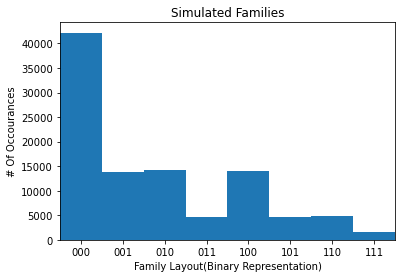

In [186]:
#Part C.)
#Let's simulate a bunch of random kid setups
import numpy as np
from numpy import random as random
import matplotlib.pyplot as plt

ChanceForBlue=0.25 #1/4 chance
MaxFamilies = 100000 #Set a limit on the loop
FamilySize=3 

# Simulate families: rows = families, columns = children (oldest → youngest)
FamilyList = np.random.rand(MaxFamilies, FamilySize) <= ChanceForBlue 
FamilyList = FamilyList.astype(int)
#cool tech of just making a huuuuge array instantly
#no loop needed. And the <= condition makes it a big array of 3 long lists with either True or False


temp=[] #doing some stuff to plot this
for i in range(len(FamilyList)):
    temp.append(int("".join(FamilyList[i].astype('str')), base=2)) 
    #Magic line, basically a Family looks like [1, 0, 0]
    #I get it to interpret these as strings not numbers. ['1', '0', '0']
    #then it concatonates those numbers,  ['100'], and reads that as a binary number [4]
    #each family layout is a unique binary number so this maps one-to-one

#I want to include this visualization for what the simulated families actually look like
fig, ax = plt.subplots()
counts, bins, bars = plt.hist(temp, bins = np.linspace(-1, 2**FamilySize, 2**FamilySize + 2)+0.5)
plt.title('Simulated Families')
plt.ylabel('# Of Occourances')
plt.xlabel('Family Layout(Binary Representation)')
plt.xlim(-0.5, 2**FamilySize - 0.5)
ax.set_xticks(np.arange(2**FamilySize))
labels = [format(i, f'0{FamilySize}b') for i in range(2**FamilySize)]
#also a magic line but basically it just generates every binary number from 0 to 2**FamilySize. With leading 0's
ax.set_xticklabels(labels) 

#OK lets actually do the checking of things
#For these parts make sure FamilySize=3 and ChanceForBlue=0.25
#Part A we want P(at least 2|1) = (P(2)+P(3)) / P(at least 1)
P_atleast1 = np.sum(counts[1:])
P_2 = counts[3] + counts[5] + counts[6] #binary representation here kinda makes this nice
P_3 = counts[7]
P_2given1 = (P_2 + P_3) / P_atleast1

print('P(at least 2|1) = ' + str(100*P_2given1) + '%')
#I get around 27% so pretty good

#Part B we want P(at least 2|XX1) thankfully again binary representation helps us. Just look at all the cases with XX1
P_001=counts[1]
P_011=counts[3]
P_101=counts[5]
P_111=counts[7]
P_2givenXX1 = (P_011+P_101+P_111) / (P_011+P_101+P_111+P_001)

print('P(at least 2|XX1) = ' + str(100*P_2givenXX1) + '%')
#again this is giving me around 43.75ish so this is giving the same expected result


In [166]:
test=np.array(['1', '0', '1'])
# "".join(test)
int("".join(test), base=2) #awesome

5

In [134]:
FamilyList = FamilyList.astype('str')

In [151]:
int("".join(FamilyList[3]), base=2)

5